In [5]:
# Install gdown if not already installed
!pip install -U -q gdown

In [6]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 75.4MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [8]:
import pandas as pd

df = pd.read_csv('/content/Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
from sklearn.preprocessing import StandardScaler


df_clean = df.drop('CUST_ID', axis=1)

df_clean['MINIMUM_PAYMENTS'] = df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].mean())
df_clean['CREDIT_LIMIT'] = df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].mean())

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_clean)

df_scaled = pd.DataFrame(df_scaled_array, columns=df_clean.columns)

print("Data berhasil diclean dan discale!")
display(df_scaled.head())

Data berhasil diclean dan discale!


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


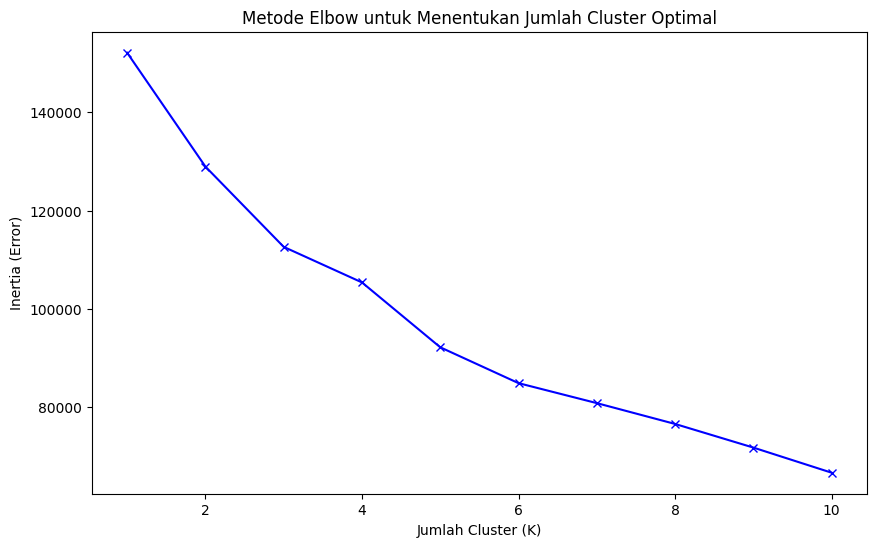

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


inertia = []
range_values = range(1, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (Error)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [11]:
kmeans_model = KMeans(n_clusters=4, random_state=42)

kmeans_model.fit(df_scaled)

df_hasil = df.copy()
df_hasil['Cluster_Label'] = kmeans_model.labels_

summary = df_hasil.drop('CUST_ID', axis=1).groupby('Cluster_Label').mean()

print("Model selesai! Berikut rata-rata perilaku setiap kelompok:")
display(summary)

Model selesai! Berikut rata-rata perilaku setiap kelompok:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_Label,,,,,,,,,,,,,,,,,
0,5023.958508,0.967107,721.184928,453.485000,267.804742,5075.737329,0.329511,0.161791,0.220253,0.510058,15.831959,10.420619,8215.313964,4176.805950,2239.198466,0.040022,11.414433
1,109.464707,0.412883,351.589913,191.487250,160.571811,299.684391,0.320703,0.072810,0.235009,0.035164,0.732394,4.812877,3628.356078,1036.107793,149.371514,0.253098,11.216633
2,1253.422099,0.974766,2181.418772,1241.370362,940.311888,234.489319,0.928436,0.390092,0.748134,0.041704,0.807310,32.718820,5120.665715,2147.982881,783.470382,0.282880,11.727477
3,1500.348531,0.966640,282.216074,209.226223,73.305481,789.088912,0.206247,0.097865,0.108084,0.157946,3.000000,3.655490,3226.815035,954.225631,815.289179,0.022924,11.485460
